In [1]:
#Cricket Player Data Analysis

<span style='font-family:Lato'><span style='font-size:110%;'>
    Today we'll be doing an End-to-End Data Analysis Project on Cricket Player Data.<br>
    We'll be analysing none other than MS Dhoni using <a href = 'https://stats.espncricinfo.com/ci/engine/player/28081.html?class=3;template=results;type=batting;view=match'> site </a>.<br>
    Web-Scrapping -- Creating the dataset -- Data Analysis -- End Report
    </span>

In [2]:
#--Importing the required libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style ='whitegrid', context ='paper', font = 'Georgia', font_scale = 1.2, palette = 'pastel')

In [3]:
#--Conecting to the site
url = 'https://stats.espncricinfo.com/ci/engine/player/28081.html?class=3;template=results;type=batting;view=match'
r = requests.get(url)
print(r.status_code)

200


In [4]:
#--Converting into beautiful soup
soup = BeautifulSoup(r.text, 'lxml')

In [5]:
#--Getting the row-wise data becasue that's how it is stored
row_data = [i.text for i in soup.find_all('tr',class_='data1')]
row_data

['\noverall\n2006-2019\n98\n85\n42\n1617\n56\n37.60\n1282\n126.13\n0\n2\n1\n116\n52\nProfile\n',
 '\n0\n0\n2\n0.00\n0\n0\n\nv South Africa\nJohannesburg\n1 Dec 2006\nT20I # 10\n',
 '\nTDNB\n-\n-\n-\n-\n-\n\nv Scotland\nDurban\n13 Sep 2007\nT20I # 26\n',
 '\n33\n33\n31\n106.45\n3\n1\n\nv Pakistan\nDurban\n14 Sep 2007\nT20I # 29\n',
 '\n24\n24\n20\n120.00\n2\n0\n\nv New Zealand\nJohannesburg\n16 Sep 2007\nT20I # 32\n',
 '\n10*\n10\n8\n125.00\n0\n0\n\nv England\nDurban\n19 Sep 2007\nT20I # 40\n',
 '\n45\n45\n33\n136.36\n4\n1\n\nv South Africa\nDurban\n20 Sep 2007\nT20I # 43\n',
 '\n36\n36\n18\n200.00\n4\n1\n\nv Australia\nDurban\n22 Sep 2007\nT20I # 45\n',
 '\n6\n6\n10\n60.00\n0\n0\n\nv Pakistan\nJohannesburg\n24 Sep 2007\nT20I # 46\n',
 '\n9*\n9\n5\n180.00\n0\n1\n\nv Australia\nBrabourne\n20 Oct 2007\nT20I # 47\n',
 '\n9\n9\n27\n33.33\n0\n0\n\nv Australia\nMelbourne\n1 Feb 2008\nT20I # 52\n',
 '\n13\n13\n17\n76.47\n1\n0\n\nv Sri Lanka\nColombo (RPS)\n10 Feb 2009\nT20I # 82\n',
 '\n2\n2\n

In [6]:
#--Getting the length of the data
len(row_data)

99

In [7]:
row_data.pop(0) #--Deleting the not reuired line as it was a part of the row data but not needed to us.

'\noverall\n2006-2019\n98\n85\n42\n1617\n56\n37.60\n1282\n126.13\n0\n2\n1\n116\n52\nProfile\n'

In [8]:
import re

In [9]:
#--Cleaning the data

#--Replacing the '\n' with ,
row_data = [i.replace('\n',',') for i in row_data]

#--Replacing the IPL type at the end with just ''
row_data = [re.sub('T20I # \d\d','',i) for i in row_data]

#--Replacing the v in oppositin to ''
row_data = [re.sub('v ','',i) for i in row_data]

#--Splitting the single string to multiple strings
row_data = [i.split(',') for i in row_data]

In [10]:
row_data[1]

['',
 'TDNB',
 '-',
 '-',
 '-',
 '-',
 '-',
 '',
 'Scotland',
 'Durban',
 '13 Sep 2007',
 '',
 '']

In [11]:
#--Converting list into a data frame
df = pd.DataFrame(row_data)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,0,0,2,0.00,0,0,,South Africa,Johannesburg,1 Dec 2006,,
1,,TDNB,-,-,-,-,-,,Scotland,Durban,13 Sep 2007,,
2,,33,33,31,106.45,3,1,,Pakistan,Durban,14 Sep 2007,,
3,,24,24,20,120.00,2,0,,New Zealand,Johannesburg,16 Sep 2007,,
4,,10*,10,8,125.00,0,0,,England,Durban,19 Sep 2007,,


In [13]:
#--Dropping reduntent columns
df.drop(columns = {0,7,11,12}, inplace = True)

In [14]:
#--Renaming the columns
columns = ['Bat1','Runs','BF','SR','4s','6s','Opposition','Ground','Start Date']
df.columns = columns

In [15]:
df.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date
0,0,0,2,0.00,0,0,South Africa,Johannesburg,1 Dec 2006
1,TDNB,-,-,-,-,-,Scotland,Durban,13 Sep 2007
2,33,33,31,106.45,3,1,Pakistan,Durban,14 Sep 2007
3,24,24,20,120.00,2,0,New Zealand,Johannesburg,16 Sep 2007
4,10*,10,8,125.00,0,0,England,Durban,19 Sep 2007


In [16]:
#--Shape of the data
df.shape

(98, 9)

In [17]:
#--Basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bat1        98 non-null     object
 1   Runs        98 non-null     object
 2   BF          98 non-null     object
 3   SR          98 non-null     object
 4   4s          98 non-null     object
 5   6s          98 non-null     object
 6   Opposition  98 non-null     object
 7   Ground      98 non-null     object
 8   Start Date  98 non-null     object
dtypes: object(9)
memory usage: 7.0+ KB


In [18]:
#--Dropping reduntent columns
df.drop(columns = {'Bat1'}, inplace = True)

In [19]:
df.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date
0,0,2,0.00,0,0,South Africa,Johannesburg,1 Dec 2006
1,-,-,-,-,-,Scotland,Durban,13 Sep 2007
2,33,31,106.45,3,1,Pakistan,Durban,14 Sep 2007
3,24,20,120.00,2,0,New Zealand,Johannesburg,16 Sep 2007
4,10,8,125.00,0,0,England,Durban,19 Sep 2007


In [20]:
#--Replacing '-' with DNB
df.replace(to_replace="-",
           value="DNB",inplace = True)

In [21]:
#--Removing the rows with DNB
df = df[df['Runs']!='DNB']
df = df[df['BF']!='DNB']
df = df[df['SR']!='DNB']
df = df[df['4s']!='DNB']
df = df[df['6s']!='DNB']

In [22]:
#--Changing the data types
data_type_dict = {'Runs' : int,
                 'BF': int,
                 'SR': float,
                 '4s': int,
                 '6s': int,
                 'Opposition': str,
                 'Ground': str}
df['Start Date']= pd.to_datetime(df['Start Date'],dayfirst=True,errors='coerce')
df = df.astype(data_type_dict)

In [23]:
#--Extracting just year from start date
df['year'] = [i.year for i in df['Start Date']]

In [24]:
#--Resetting index after dropping rows
df.reset_index(inplace = True)
df.drop(columns = {'index'}, inplace = True)

In [25]:
first_match = df['Start Date'].min()
last_match = df['Start Date'].max()
matches_played = df.shape[0]
runs_score = df['Runs'].sum()
avg_sr = df['SR'].mean()
balls_faced = df['BF'].sum()
avg_score = df['Runs'].mean()
_100 = df.loc[df['Runs'] >= 100].shape[0]
_50 = df.loc[(df['Runs']>=50)&(df['Runs']<100)].shape[0]
_4 = df["4s"].sum()
_6 = df["6s"].sum()

In [26]:
print(f"The first match was played on : {first_match}")
print(f"The last match was played on : {last_match}")
print(f"Total no. of matches played : {matches_played}")
print(f"Total runs scored : {runs_score}")
print(f"Career avg strike rate :  {avg_sr}")
print(f"Balls faced in career : {balls_faced}")
print(f"Career avg score : {avg_score}")
print(f"No. of 100's : {_100}")
print(f"No. of 50's :  {_50}")
print(f"No. of 4's :{_4}")
print(f"No. of 6's : {_6}")

The first match was played on : 2006-12-01 00:00:00
The last match was played on : 2019-02-27 00:00:00
Total no. of matches played : 84
Total runs scored : 1617
Career avg strike rate :  133.79345238095237
Balls faced in career : 1282
Career avg score : 19.25
No. of 100's : 0
No. of 50's :  2
No. of 4's :116
No. of 6's : 52


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


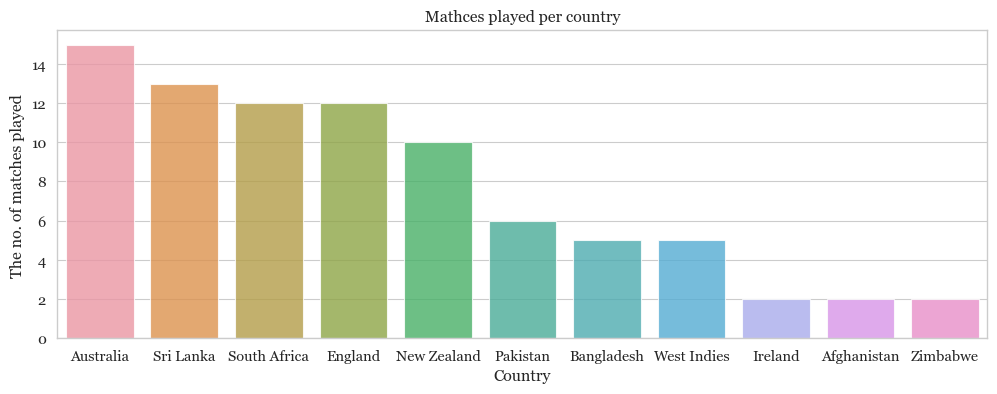

In [27]:
#--Matches palyed per country
opp_count = df['Opposition'].value_counts()
plt.figure(figsize = (12,4))
sns.barplot(opp_count.index, opp_count.values,alpha = 0.8)
plt.ylabel('The no. of matches played ')
plt.xlabel('Country')
plt.title('Mathces played per country')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


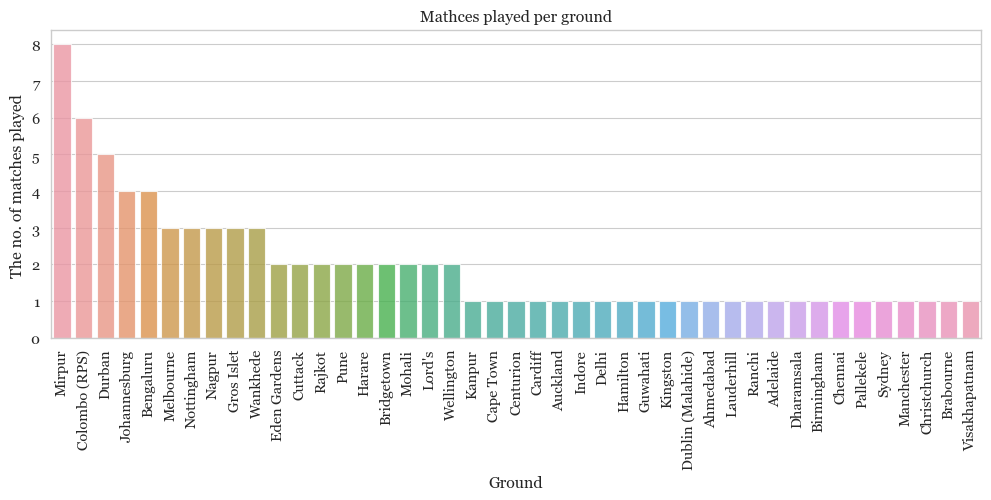

In [28]:
#--Matches played per ground
ground_count = df['Ground'].value_counts()
plt.figure(figsize = (12,4))
sns.barplot(ground_count.index, ground_count.values,alpha = 0.8)
plt.ylabel('The no. of matches played ')
plt.xlabel('Ground')
plt.xticks(rotation = '90')
plt.title('Mathces played per ground')
plt.show()

Text(0, 0.5, 'Strike Rate')

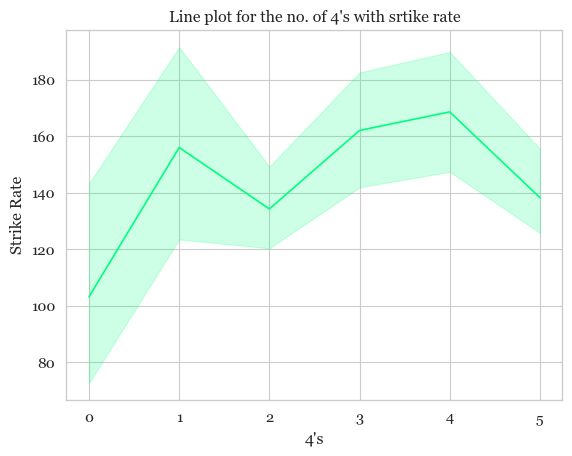

In [29]:
#--How does no. of 4's vary with strike rate
sns.lineplot(data=df, x = '4s', y = 'SR',color = 'springgreen')
plt.title("Line plot for the no. of 4's with srtike rate")
plt.xlabel("4's")
plt.ylabel('Strike Rate')

Text(0, 0.5, 'Strike Rate')

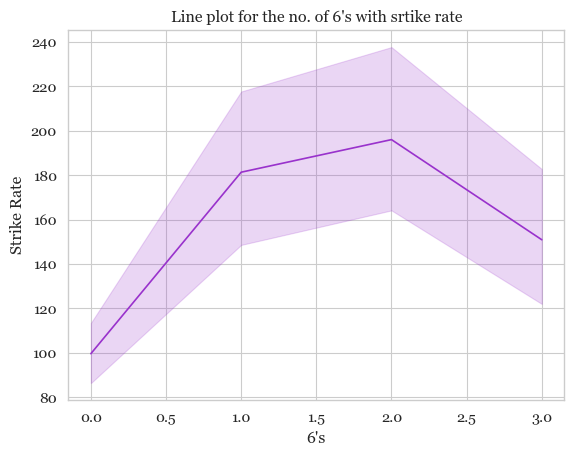

In [30]:
#--How does no. of 6's vary with strike rate
sns.lineplot(data=df, x = '6s', y = 'SR',color = 'darkorchid')
plt.title("Line plot for the no. of 6's with srtike rate")
plt.xlabel("6's")
plt.ylabel('Strike Rate')

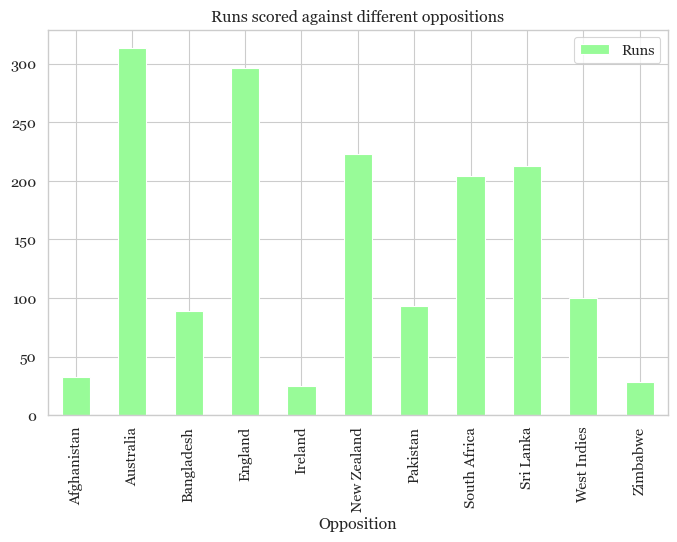

In [31]:
#--Runs scored against opposition
runs_scored_oppositions = pd.DataFrame(df.groupby('Opposition')['Runs'].sum())
runs_scored_oppositions.plot(kind = 'bar',title='Runs scored against different oppositions', figsize=(8, 5), 
                             color = 'palegreen')
plt.show()

<AxesSubplot:xlabel='Opposition'>

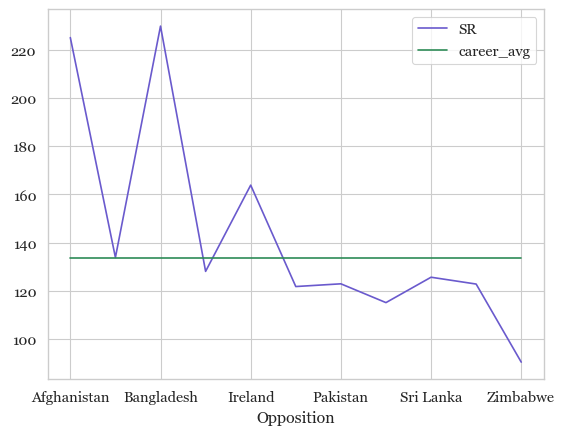

In [32]:
#--Avg strike rate and againt opposition
career_avg = df['SR'].mean()
opp_avg = pd.DataFrame(df.groupby('Opposition')['SR'].mean())
opp_avg['career_avg'] = career_avg
opp_avg.plot(kind = 'line',color = ['slateblue','seagreen'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2006.0'),
  Text(1, 0, '2007.0'),
  Text(2, 0, '2008.0'),
  Text(3, 0, '2009.0'),
  Text(4, 0, '2010.0'),
  Text(5, 0, '2011.0'),
  Text(6, 0, '2012.0'),
  Text(7, 0, '2013.0'),
  Text(8, 0, '2014.0'),
  Text(9, 0, '2015.0'),
  Text(10, 0, '2016.0'),
  Text(11, 0, '2017.0'),
  Text(12, 0, '2018.0'),
  Text(13, 0, '2019.0')])

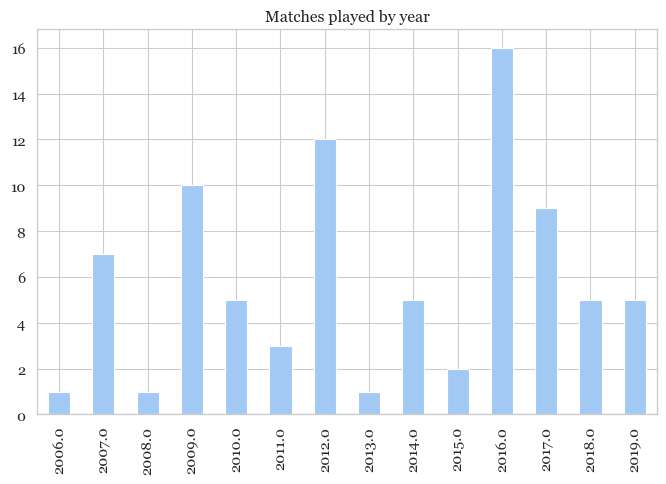

In [33]:
#--Matches played per year
df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
plt.xticks(rotation=90)

In [34]:
df.to_csv('MS Dhoni')

<span style='font-family:Lato'><span style='font-size:110%;'>
    <title> MS DHONI </title>
    <ul><span style='font-family:Lato'><span style='font-size:110%;'>
        <li>The first match was played on : 2006-12-01 00:00:00 </li>
        <li>The last match was played on : 2019-02-27 00:00:00 </li>
        <li>Total no. of matches played : 84</li>
        <li>Total runs scored : 1617</li>
        <li>Career avg strike rate :  133.79345238095237</li>
        <li>Balls faced in career : 1282</li>
        <li>Career avg score : 19.25</li>
        <li>No. of 100's : 0</li>
        <li>No. of 50's :  2</li>
        <li>No. of 4's :116</li>
        <li>No. of 6's : 52</li>
    
<span style='font-family:Lato'><span style='font-size:110%;'> MS Dhoni played his first match in the year 2006 with also least number of matches played in that year.He played most in the year 2016.</span>
        
<span style='font-family:Lato'><span style='font-size:110%;'> He played the most against Australia with max runs scored and least mathces with Zimbabwae with the minimum runs scored.</span>